In [48]:
import random
import pandas as pd
import numpy as np
from pandas import Series,DataFrame


In [49]:
# Prepping the data
data= pd.read_csv('C:\BSY\Data science\python\Recommendation\Master_data1.csv')
data.head()

,User_id,Mf_id,Name,Plan,Category,Num_times_searched,Num_times_clicked,Time_spent,Added_watchlist,Purchased,watchlist_dummy_generator,purchased_dummy_ generator
0,1,21,Axis Long Term Equity Fund - GrowthELSS,Regular,ELSS,10,10,34,0,0,8,5
1,1,280,Taurus Taxshield - Direct Plan - GrowthELSS,Direct Plan,ELSS,13,5,145,0,0,18,9
2,1,112,ICICI Prudential Bluechip Fund - Direct Plan -...,Direct Plan,Large Cap Fund,10,10,37,1,0,3,14
3,1,74,Edelweiss Long Term Equity Fund (Tax Savings) ...,Direct Plan,ELSS,11,4,8,0,0,18,5
4,1,73,Edelweiss Large Cap Fund - GrowthLarge Cap Fund,Regular,Large Cap Fund,10,6,142,0,0,14,14


In [50]:
data.drop(['watchlist_dummy_generator','purchased_dummy_ generator'],axis=1,inplace=True)
#data.head()
data.describe()

,User_id,Mf_id,Num_times_searched,Num_times_clicked,Time_spent,Added_watchlist,Purchased
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,99.651800,145.829800,10.042200,5.518400,153.504600,0.146600,0.068200
std,57.647387,87.893915,5.775802,3.211436,86.470528,0.353742,0.252114
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,50.000000,71.000000,5.000000,3.000000,78.000000,0.000000,0.000000
50%,99.000000,141.000000,10.000000,6.000000,155.000000,0.000000,0.000000
75%,149.000000,222.000000,15.000000,8.000000,229.000000,0.000000,0.000000
max,200.000000,300.000000,20.000000,15.000000,300.000000,1.000000,1.000000


In [51]:
# normalising the values to have a common scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
data[['Num_times_searched','Num_times_clicked','Time_spent']]=mms.fit_transform(data[['Num_times_searched','Num_times_clicked','Time_spent']])
#data.head()

In [52]:
#creating a db of unique mf names
import warnings
warnings.filterwarnings("ignore")
mf_unique_list=data.drop_duplicates(subset=['Mf_id'])
mf_unique_list.drop(['Plan','Category','Num_times_searched','Num_times_clicked','Time_spent','Added_watchlist','Purchased'],axis=1,inplace=True)
mf_unique_list.head()


,User_id,Mf_id,Name
0,1,21,Axis Long Term Equity Fund - GrowthELSS
1,1,280,Taurus Taxshield - Direct Plan - GrowthELSS
2,1,112,ICICI Prudential Bluechip Fund - Direct Plan -...
3,1,74,Edelweiss Long Term Equity Fund (Tax Savings) ...
4,1,73,Edelweiss Large Cap Fund - GrowthLarge Cap Fund


In [53]:
#creating the Affinity /Likablity index 

data['Affinity_score']=data['Num_times_searched']*1 + data['Num_times_clicked']*1.5 + \
data['Time_spent']*2 + data['Added_watchlist']*3 + data['Purchased']*5
data.head()

,User_id,Mf_id,Name,Plan,Category,Num_times_searched,Num_times_clicked,Time_spent,Added_watchlist,Purchased,Affinity_score
0,1,21,Axis Long Term Equity Fund - GrowthELSS,Regular,ELSS,0.50,0.666667,0.110368,0,0,1.720736
1,1,280,Taurus Taxshield - Direct Plan - GrowthELSS,Direct Plan,ELSS,0.65,0.333333,0.481605,0,0,2.113211
2,1,112,ICICI Prudential Bluechip Fund - Direct Plan -...,Direct Plan,Large Cap Fund,0.50,0.666667,0.120401,1,0,4.740803
3,1,74,Edelweiss Long Term Equity Fund (Tax Savings) ...,Direct Plan,ELSS,0.55,0.266667,0.023411,0,0,0.996823
4,1,73,Edelweiss Large Cap Fund - GrowthLarge Cap Fund,Regular,Large Cap Fund,0.50,0.400000,0.471572,0,0,2.043144


In [54]:
data.describe()

,User_id,Mf_id,Num_times_searched,Num_times_clicked,Time_spent,Added_watchlist,Purchased,Affinity_score
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,99.651800,145.829800,0.50211,0.367893,0.510049,0.146600,0.068200,2.854848
std,57.647387,87.893915,0.28879,0.214096,0.289199,0.353742,0.252114,1.804986
min,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.140468
25%,50.000000,71.000000,0.25000,0.200000,0.257525,0.000000,0.000000,1.682860
50%,99.000000,141.000000,0.50000,0.400000,0.515050,0.000000,0.000000,2.321906
75%,149.000000,222.000000,0.75000,0.533333,0.762542,0.000000,0.000000,3.243060
max,200.000000,300.000000,1.00000,1.000000,1.000000,1.000000,1.000000,11.659532


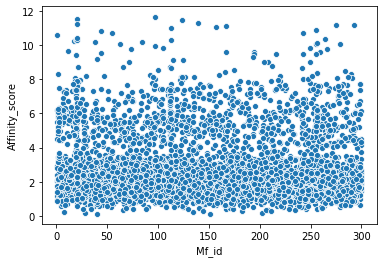

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.scatterplot('Mf_id','Affinity_score',data=data)

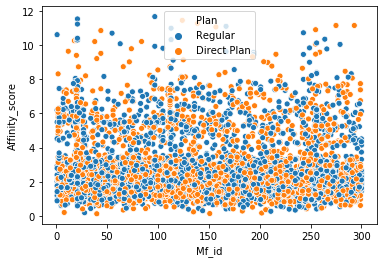

In [56]:

sns.scatterplot('Mf_id','Affinity_score',data=data, hue='Plan')
#sns.scatterplot('Mf_id','Affinity_score',data=data, hue='Category')
#sns.catplot( 'Purchased', 'Affinity_score', data=data, kind='violin')
#sns.scatterplot( 'Mf_id', 'Affinity_score', data=data, hue='Purchased')

In [57]:
#creating User-item interaction matrix
ui_matrix= data.pivot_table(index='User_id', columns='Mf_id', values='Affinity_score')
ui_matrix.head()

Mf_id,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
User_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,1.328428,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.038963,NaN,NaN,NaN,NaN,NaN,NaN,2.217726
2,NaN,NaN,NaN,NaN,NaN,NaN,1.052341,NaN,NaN,3.136622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.301171
3,NaN,5.158027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.750167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2.322575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2.052843,NaN,NaN,2.405853,NaN,2.290970,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.651171,2.491304


In [58]:
#Replacing  NaN with 0 values
ui_matrix.fillna(0,inplace=True)
ui_matrix.head(10)

Mf_id,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
User_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.000000,0.000000,1.328428,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,5.038963,0.0,0.0,0.0,0.0,0.000000,0.000000,2.217726
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.052341,0.0,0.000000,3.136622,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,2.301171
3,0.0,5.158027,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,4.750167,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,2.322575,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,0.0,2.052843,0.000000,0.000000,2.405853,0.000000,2.290970,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.651171,2.491304
6,0.0,0.000000,2.614883,2.989465,0.000000,0.000000,0.000000,0.0,3.061706,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,4.465719,5.373411,7.324415,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.226923,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [59]:
#just cheking  the sparcity oft he UImatrix
sparsity = 1.0 - ( np.count_nonzero(ui_matrix) / float(ui_matrix.size) )
print(sparsity)

0.9200333333333334


In [60]:
#Top rated MF
top_mf=data.groupby('Mf_id')['Affinity_score'].mean().sort_values(ascending=False).head(10)
print(top_mf)

Mf_id
20     4.135373
124    4.041112
21     4.024706
113    4.003594
256    3.994697
112    3.987043
105    3.945926
97     3.911497
243    3.904290
249    3.872732
Name: Affinity_score, dtype: float64


In [61]:
# trying to fin the most similar items in neighbourhood
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: Series(x.sort_values(ascending=False).iloc[:n].index, 
          index=['top {}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [62]:
#creating a comma seprated user-item list that list all the items interacted by an user
#item_list = data.astype({"Mf_id": str})
#user_item_list= item_list.groupby(by = 'User_id')['Mf_id'].apply(lambda x:','.join(x))


In [63]:
#Item Item similarity matrix
# finding Item similarity using cosine similarity

from sklearn.metrics.pairwise import cosine_similarity
#transpose the UI_matrix
ui_transpose=ui_matrix.transpose()
cs = cosine_similarity(ui_transpose)
#make digonal zero otherwise same item will  be selected as most simialar item
np.fill_diagonal(cs, 0 )
item_similarity = DataFrame(cs,index=ui_transpose.index)
item_similarity.columns=ui_transpose.index
item_similarity.head()

Mf_id,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
Mf_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.027720,0.066506,0.000000,0.020675,0.070094,0.000000,0.006263,0.000000,0.032408,...,0.178268,0.086054,0.000000,0.086869,0.188320,0.022409,0.000000,0.079705,0.033306,0.008458
2,0.027720,0.000000,0.191573,0.114404,0.145386,0.071300,0.196050,0.121014,0.039397,0.103165,...,0.103933,0.140066,0.048234,0.035151,0.291239,0.065989,0.073605,0.083753,0.009305,0.046012
3,0.066506,0.191573,0.000000,0.219851,0.050027,0.041547,0.097899,0.045861,0.152822,0.073689,...,0.054744,0.028550,0.122310,0.179869,0.060059,0.130103,0.166536,0.023349,0.155089,0.029969
4,0.000000,0.114404,0.219851,0.000000,0.042362,0.000000,0.091209,0.116095,0.066605,0.197243,...,0.049339,0.062772,0.230710,0.155184,0.000000,0.066862,0.064617,0.024837,0.041978,0.085607
5,0.020675,0.145386,0.050027,0.042362,0.000000,0.298888,0.291783,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.062631,0.024923,0.192987,0.047847,0.000000,0.073451,0.023091,0.146243


In [64]:
#to check
cosine_similarity(ui_matrix[275].values.reshape(1, -1), ui_matrix[293].values.reshape(1, -1))


array([[0.37255883]])

In [65]:
# top 10 neighbours for each item
sim_items = find_n_neighbours(item_similarity,10)
#sim_items[274:275]
sim_items.head()

,top 1,top 2,top 3,top 4,top 5,top 6,top 7,top 8,top 9,top 10
Mf_id,,,,,,,,,,
1,202,145,77,215,60,185,245,34,284,84
2,260,170,58,295,232,24,166,282,269,258
3,221,199,180,68,101,75,123,143,99,15
4,286,45,136,65,89,20,229,256,93,293
5,118,228,179,71,153,6,7,262,81,148


In [66]:
def item_item_based_recommendation(user):
    user_interacted_items= ui_matrix.columns[ui_matrix[ui_matrix.index==user].any()].tolist()
    
    affinity=[]
    for item in user_interacted_items:
        affinity.append(ui_matrix.loc[user,item])
    user_vector=DataFrame({'Mf_id':user_interacted_items,'affinity':affinity})
    
    item_list_universe=[] # this is unique list of possible items sets
    for item  in user_interacted_items:
        a=sim_items[sim_items.index==item].values
        b=a.squeeze().tolist()
        item_list_universe=item_list_universe +b
       
        b=[]
  

    items_under_consideration = list(set(item_list_universe)-set(list(map(str,user_interacted_items ))))
    type(items_under_consideration)
    items_under_consideration = list(map(int, items_under_consideration))
 
    
    score=[]
    for item in items_under_consideration:
        corr=item_similarity.loc[item,user_interacted_items]
        fin = pd.concat([user_vector, corr], axis=1)
        fin.columns = ['Mf_id','Affinity_score','correlation']
        fin['score']=fin.apply(lambda x:x['Affinity_score'] * x['correlation'],axis=1)
        final_score=fin['score'].sum()/fin['correlation'].sum()
        score.append(final_score)
    temp = DataFrame({'Mf_id':items_under_consideration,'score':score})
   
    top_5_recommendation = temp.sort_values(by='score',ascending=False).head(5)
    top5=top_5_recommendation.to_string(index=False)
 
    mf_recommendation_details =  top_5_recommendation.merge(mf_unique_list, how='inner', on='Mf_id')
    recommendation_print=    mf_recommendation_details.drop(['User_id'],axis=1)
    print("----------------------------------------------------------------------------------------------")
    print ("The top 5 highest rated mf by similar users")
    print(" ")
    print (recommendation_print)
    print(" ")
    print("----------------------------------------------------------------------------------------------")
    mf_recommendation_list = mf_recommendation_details.Name.values.tolist()
    return  mf_recommendation_list  
        
    
    
    
    


In [67]:
user_range=list(range(1,201))

user=''
while user not in user_range:
    user = int(input("Enter the user id to whom you want to recommend :1-200 "))
    if user not in user_range:
        print("invalid input: please enter correct value in the range:  1-200") 
print ("The current usage profile of user no ",user," is:")


print("   ")

profile = data[(data['User_id'] == user)]
profile_sort=profile.sort_values(by='Affinity_score', ascending=False)
user_top5=profile_sort[['Mf_id','Name','Affinity_score']]
print(user_top5.head(5))
print("   ")


print(" based on item-item similarity the recommendations are :")
predicted_items = item_item_based_recommendation(user)
print(" ")
print("The Recommendations for User Id :", user)
print(" ")
for i in predicted_items:
    print(i)





Enter the user id to whom you want to recommend :1-200 1
The current usage profile of user no  1  is:
   
     Mf_id                                               Name  Affinity_score
8       21            Axis Long Term Equity Fund - GrowthELSS        6.303177
27     133  IDFC Bond Fund - Short Term - Direct Plan - Gr...        6.248161
7      190       LIC MF Large Cap Fund - GrowthLarge Cap Fund        5.727592
10     272  Tata Large Cap Fund - Regular Plan - GrowthLar...        5.646154
392    293  UTI Mastershare Unit Scheme - Direct Plan - Gr...        5.038963
   
 based on item-item similarity the recommendations are :
----------------------------------------------------------------------------------------------
The top 5 highest rated mf by similar users
 
   Mf_id     score                                               Name
0     36  1.632527  BNP Paribas Large Cap Fund - Direct Plan - Gro...
1    153  1.622088  Invesco India Short Term Fund - Direct Plan - ...
2    179  1.53